In [1]:
%matplotlib inline
import os, sys, glob, fnmatch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from scipy import interpolate

In [2]:
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family('serif')
font.set_size('large')

In [3]:
DATA_DIR = '/Volumes/PFagrelius_Backup/sky_data/'

In [4]:
meta_dir = '/Users/parkerf/Research/SkyModel/BOSS_Sky/Analysis/MetaData/good_100_meta_rich.npy'
moon_meta_dir = '/Users/parkerf/Research/SkyModel/BOSS_Sky/Analysis/MetaData/moon_meta_rich.npy'
Meta = np.load(meta_dir)
MoonMeta = np.load(moon_meta_dir)

In [5]:
MetaData = np.hstack([Meta,MoonMeta])

In [77]:
Red_Data = MetaData[(MetaData['CAMERAS'] == b'r1') | (MetaData['CAMERAS'] == b'r2')]
Blue_Data = MetaData[(MetaData['CAMERAS'] == b'b1') | (MetaData['CAMERAS'] == b'b2')]

In [78]:
Blue_Data = Blue_Data[ (Blue_Data['AIRMASS'] < 1.1) &(Blue_Data['DAYS2FULL'] <7.1 ) & (Blue_Data['DAYS2FULL'] >6.9 )]

In [83]:
np.unique(Blue_Data['PLATE'])

array([3983, 5376, 5970, 7339], dtype=int32)

In [8]:
plates = np.random.choice(np.unique(Blue_Data['PLATE']),10)

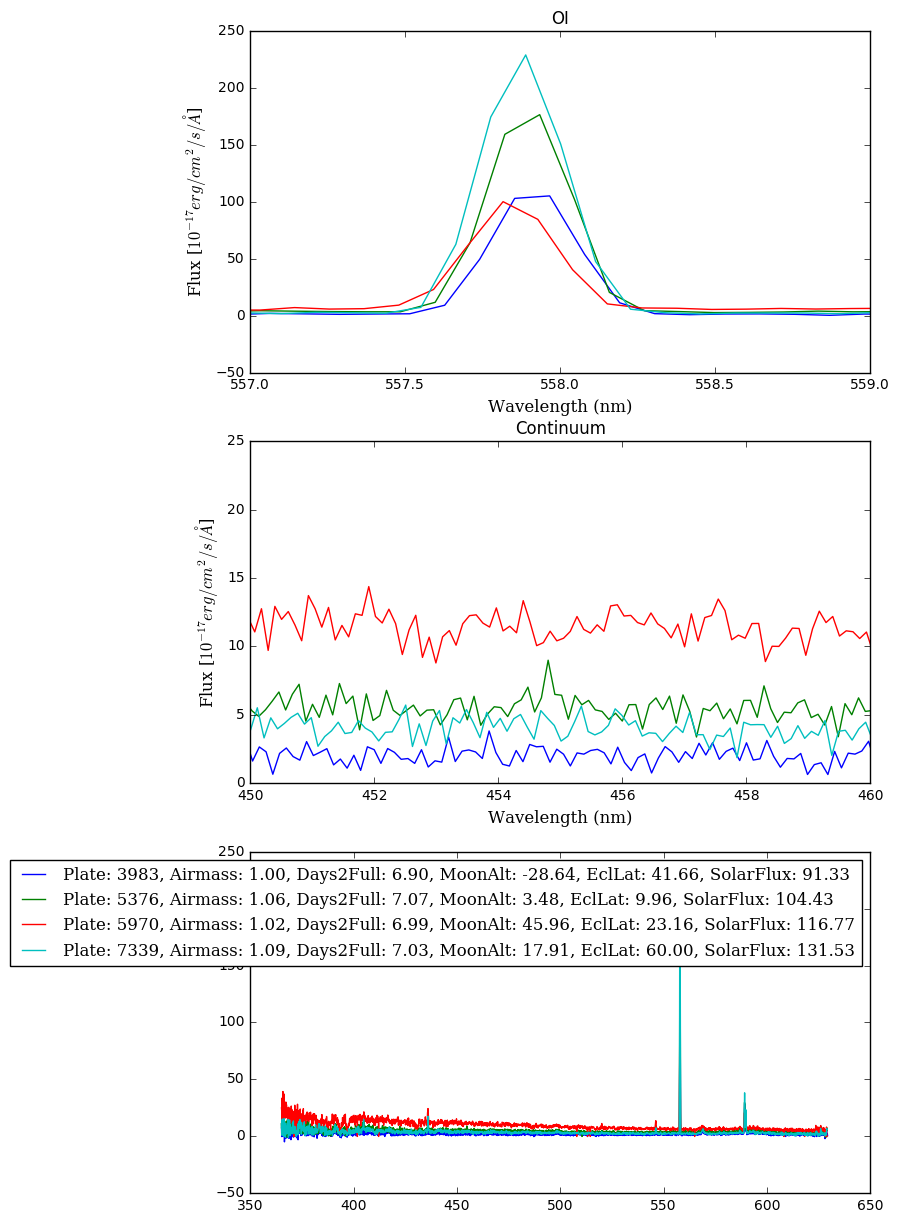

In [106]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=[8,15])
for plate in np.unique(Blue_Data['PLATE']):
    mydata = Blue_Data[Blue_Data['PLATE'] == plate]
    data = np.load(DATA_DIR+'/sky_flux/%s_calibrated_sky.npy' % str(plate))
    myspecno = np.random.choice(mydata['SPECNO'],1)[0]
    spectrum = data[myspecno]
    ax1.plot(spectrum['WAVE'], spectrum['SKY'],label=plate)
    ax1.set_xlabel('Wavelength (nm)', fontproperties=font)
    ax1.set_ylabel('Flux [$10^{-17} erg/cm^{2}/s/\AA$]',fontproperties=font)
    ax2.plot(spectrum['WAVE'], spectrum['SKY'],label=plate)
    ax2.set_xlabel('Wavelength (nm)', fontproperties=font)
    ax2.set_ylabel('Flux [$10^{-17} erg/cm^{2}/s/\AA$]',fontproperties=font)
    ax3.plot(spectrum['WAVE'], spectrum['SKY'],label='Plate: %d, Airmass: %.2f, Days2Full: %.2f, MoonAlt: %.2f, EclLat: %.2f, SolarFlux: %.2f'%(plate, mydata['AIRMASS'][0],mydata['DAYS2FULL'][0], mydata['MOON_ALT'][0], mydata['ECL_LAT'][0], mydata['SOLARFLUX'][0]))
ax1.set_xlim([557, 559])
ax1.set_title("OI")
#ax1.text(558.2,100,'[OI] \nAirmass: <1.1\nMoon: 7 days to full',fontproperties=font)
ax2.set_xlim([455-5., 455+5])
ax2.set_ylim([0,25])
ax2.set_title('Continuum')
ax3.legend(prop=font)
#ax1.text(558.2,100,'[OI] \nAirmass: <1.1\nMoon: 7 days to full',fontproperties=font)
#plt.legend()

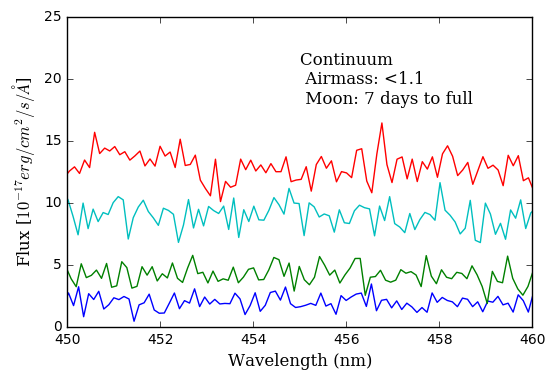

In [100]:
for plate in np.unique(Blue_Data['PLATE']):
    mydata = Blue_Data[Blue_Data['PLATE'] == plate]
    data = np.load(DATA_DIR+'/sky_flux/%s_calibrated_sky.npy' % str(plate))
    myspecno = np.random.choice(mydata['SPECNO'],1)[0]
    spectrum = data[myspecno]
    plt.plot(spectrum['WAVE'], spectrum['SKY'],label=mydata['DAYS2FULL'][0])
    plt.xlabel('Wavelength (nm)', fontproperties=font)
    plt.ylabel('Flux [$10^{-17} erg/cm^{2}/s/\AA$]',fontproperties=font)
plt.xlim([455-5., 455+5])
plt.ylim([0,25])
#plt.legend()
plt.text(455,18,'Continuum \n Airmass: <1.1\n Moon: 7 days to full',fontproperties=font)